# M01 Lab: Further Exploration

DS 5001 Text as Data

We continue exploring the Gutenberg text, looking at how words are distributed over time, in this case the narrative time of the text.

We should this distribution using simple word dispersion plots.

We also look at how word distributions are correlated.


## Set Up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style='darkgrid')

In [3]:
data_home = "../input"
output_dir = "../working"
prev_nb = f"{data_home}/uva-ds-5001-m01-01-first-foray"

### Retrieve Data

In [4]:
TOKEN = pd.read_csv(f"{prev_nb}/M01-ff-TOKENS.csv")[['term_str']].dropna()
TOKEN.index.name = 'token_pos'
VOCAB = pd.read_csv(f"{prev_nb}/M01-ff-VOCAB.csv").dropna().set_index('term_str')

In [5]:
TOKEN.head()

,term_str
token_pos,
0,the
1,project
2,gutenberg
3,ebook
4,of


In [6]:
VOCAB.head()

,n,p
term_str,,
the,3501,0.040564
to,2862,0.033161
and,2851,0.033033
of,2684,0.031098
a,1648,0.019095


## Word Dispersion Plots

We create a simple dispersion plot to show the distribution of words over narrative time.


### Using a Strip Plot

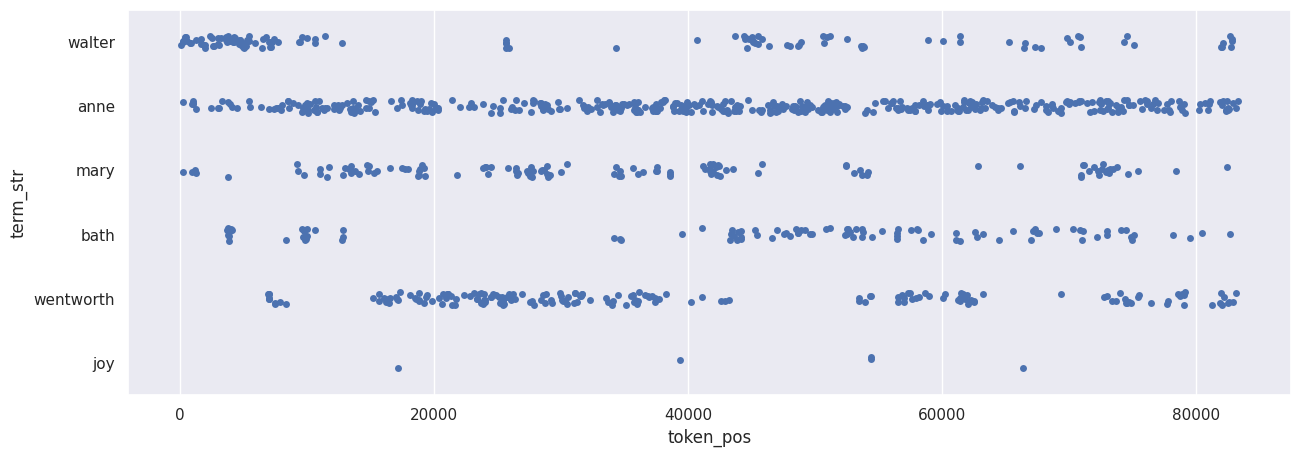

In [7]:
my_cols = ['anne','wentworth','walter', 'joy', 'mary', 'bath']


plt.figure(figsize=(15, 5))
sns.stripplot(TOKEN[TOKEN.term_str.isin(my_cols)], x='token_pos', y='term_str',
             jitter=True)
plt.show()

### Using One Hot Encoding

In [8]:
DISPERSION = pd.get_dummies(TOKEN.term_str, dtype='int')
DISPERSION.index.name = 'token_pos'
DISPERSION = DISPERSION[DISPERSION.sum(1) == 1] # Remove rows without a 1
DISPERSION[VOCAB[VOCAB.n >= 10].index] # Remove cols with fewer than 10 words
DISPERSION.head()

,1,10,105,105txt,105zip,11,12,13,14,15,...,yours,yourself,yourselves,youth,youthful,youthkilling,z,zeal,zealous,zealously
token_pos,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


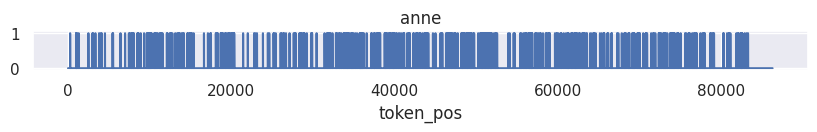

In [9]:
DISPERSION['anne'].plot(figsize=(10, .5), title="anne")
plt.show()

In [10]:
def word_plot(term_str):
    term_str = term_str.lower()
    DISPERSION[term_str].plot(figsize=(10, .5), legend=False, title=term_str);

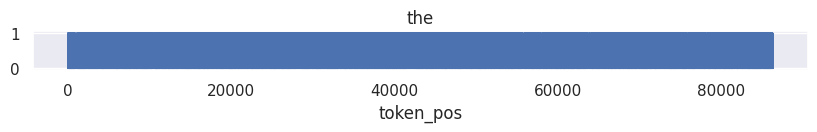

In [11]:
word_plot('the')

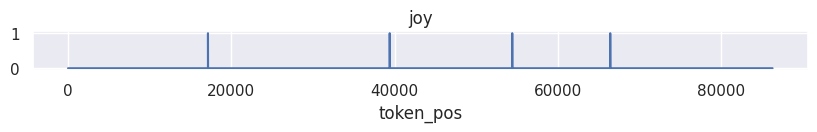

In [12]:
word_plot('joy')

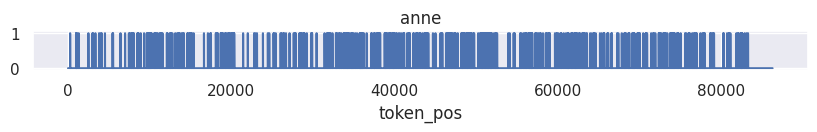

In [13]:
word_plot('anne')

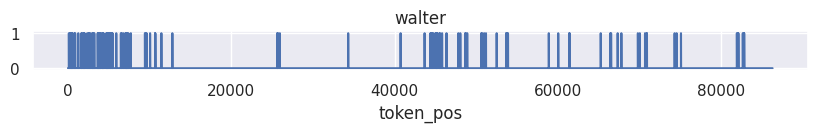

In [14]:
word_plot('walter')

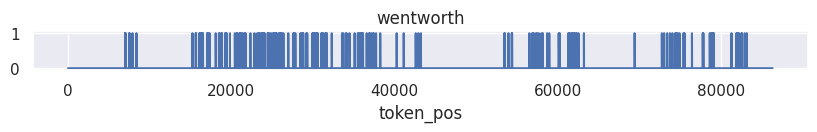

In [15]:
word_plot('wentworth')

### Heatmap

We chunk narrative time into 100 chunks of equal length (centiles). 

Then we count how many times each word appears in each centile.

In [16]:
G = DISPERSION.groupby(pd.cut(DISPERSION.index, 100), observed=False).sum()
G = G.reset_index(drop=True)
G.head()

,1,10,105,105txt,105zip,11,12,13,14,15,...,yours,yourself,yourselves,youth,youthful,youthkilling,z,zeal,zealous,zealously
0,3,0,1,0,0,0,0,0,0,2,...,0,0,0,1,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


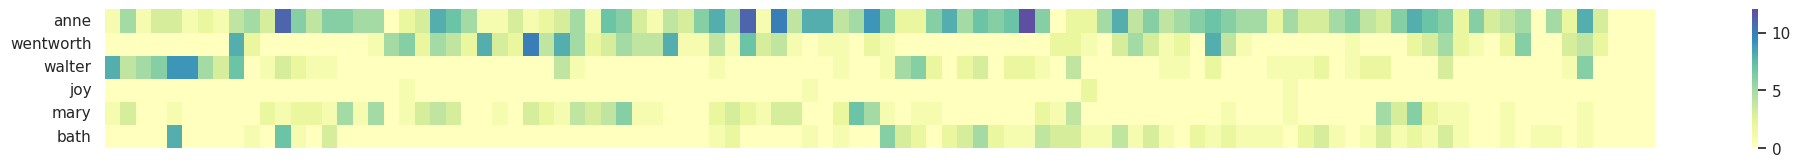

In [17]:
plt.figure(figsize=(25, len(my_cols) * .3))
sns.heatmap(G[my_cols].T, cmap='Spectral', center=0)
plt.yticks(rotation=0)
plt.xticks([])
plt.xlabel('')
plt.show()

## Correlation Graphs

We compare plots for pairs of words.

### Convert to relative frequency

In [18]:
GN = G / G.sum()
GN.head()

,1,10,105,105txt,105zip,11,12,13,14,15,...,yours,yourself,yourselves,youth,youthful,youthkilling,z,zeal,zealous,zealously
0,0.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,...,0.0,0.0,0.0,0.071429,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.071429,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.5,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
def pair_corr(a, b, method='kendall'):
    return float(G[[a,b]].corr(method=method).values[0,1].round(2))

In [20]:
pair_corr('wentworth', 'anne')

0.04

In [21]:
pair_corr('walter', 'anne')

-0.05

In [22]:
pair_corr('walter', 'wentworth')

-0.27

### Visualize

In [23]:
def plot_cooc(a, b, norm=1):
    my_corr = pair_corr(a,b)
    X = GN if norm else G
    norm_label = f"(normed)" * norm
    X[[a,b]].rolling(10).mean().plot(figsize=(20,5), style='-', title=f"{a}, {b} {my_corr} {norm_label}")

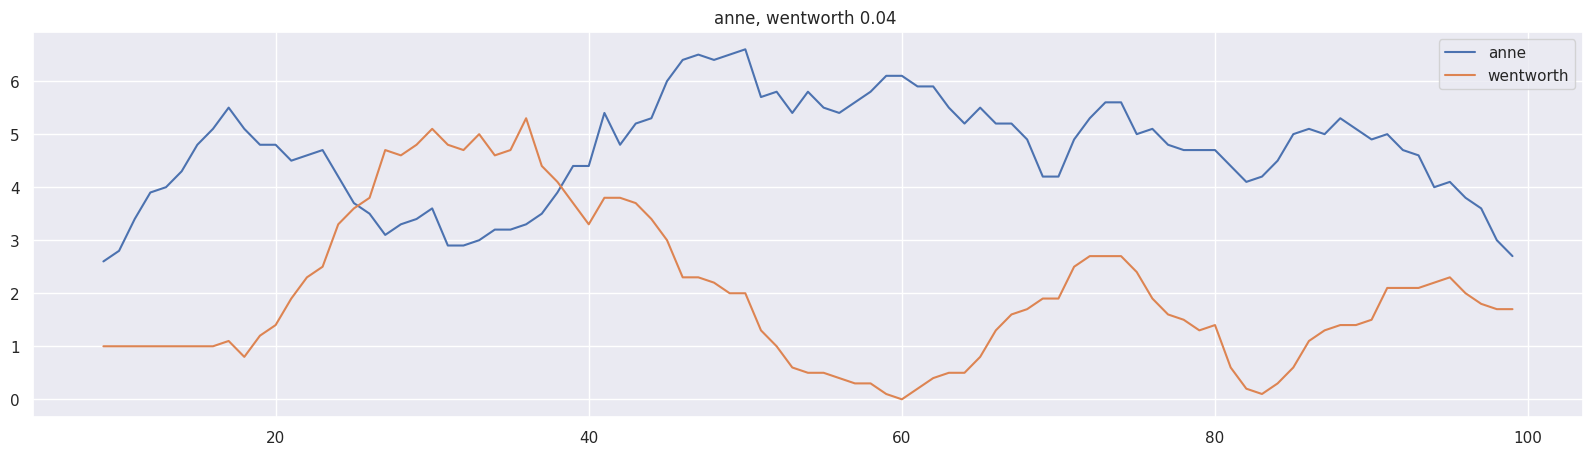

In [24]:
plot_cooc('anne','wentworth', 0)

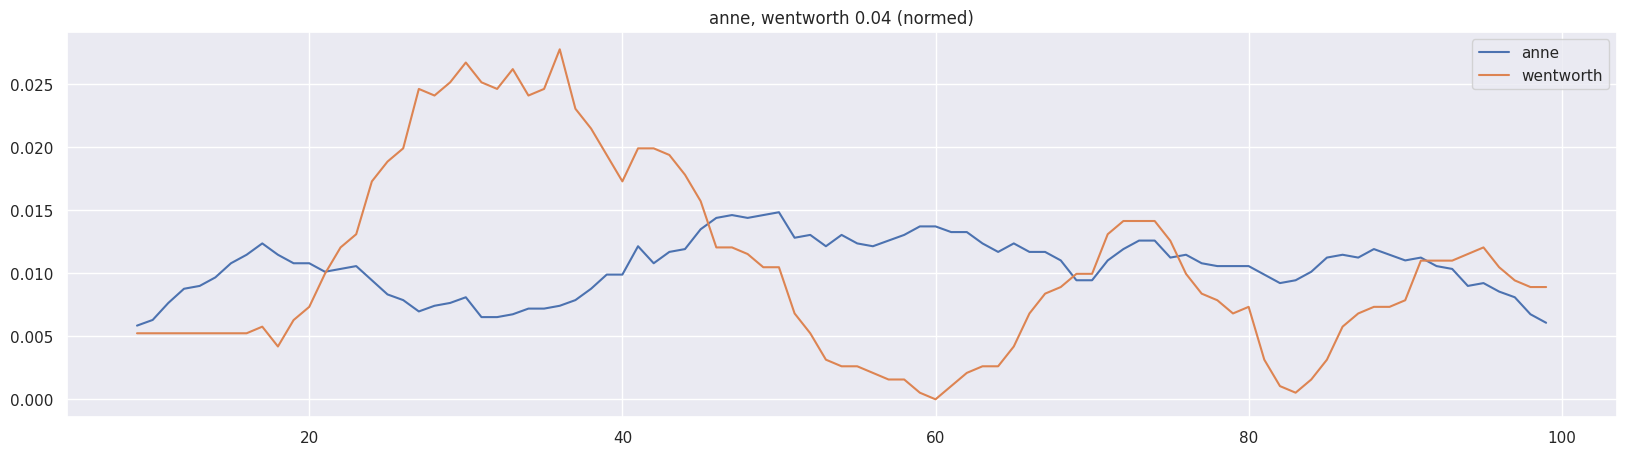

In [25]:
plot_cooc('anne','wentworth')

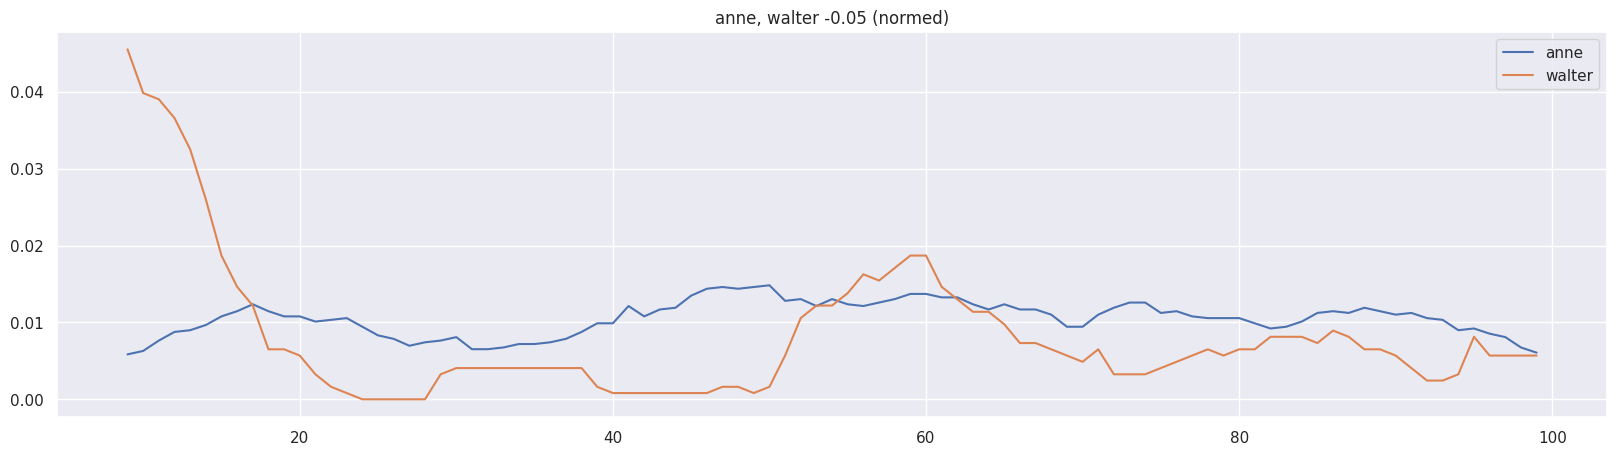

In [26]:
plot_cooc('anne','walter')

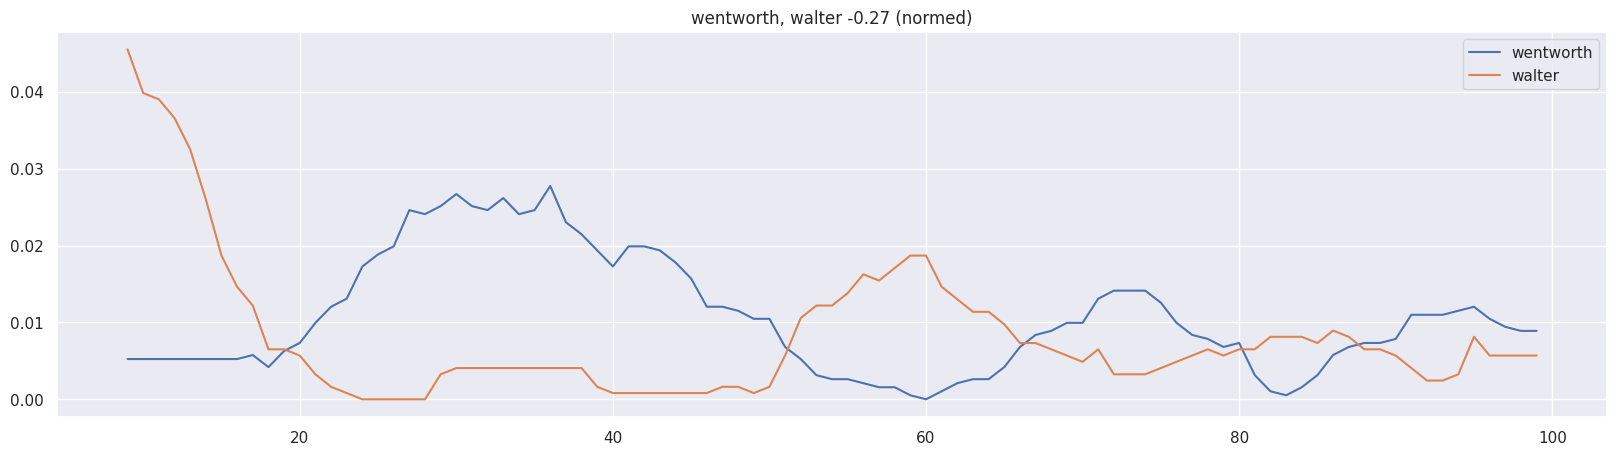

In [27]:
plot_cooc('wentworth','walter')

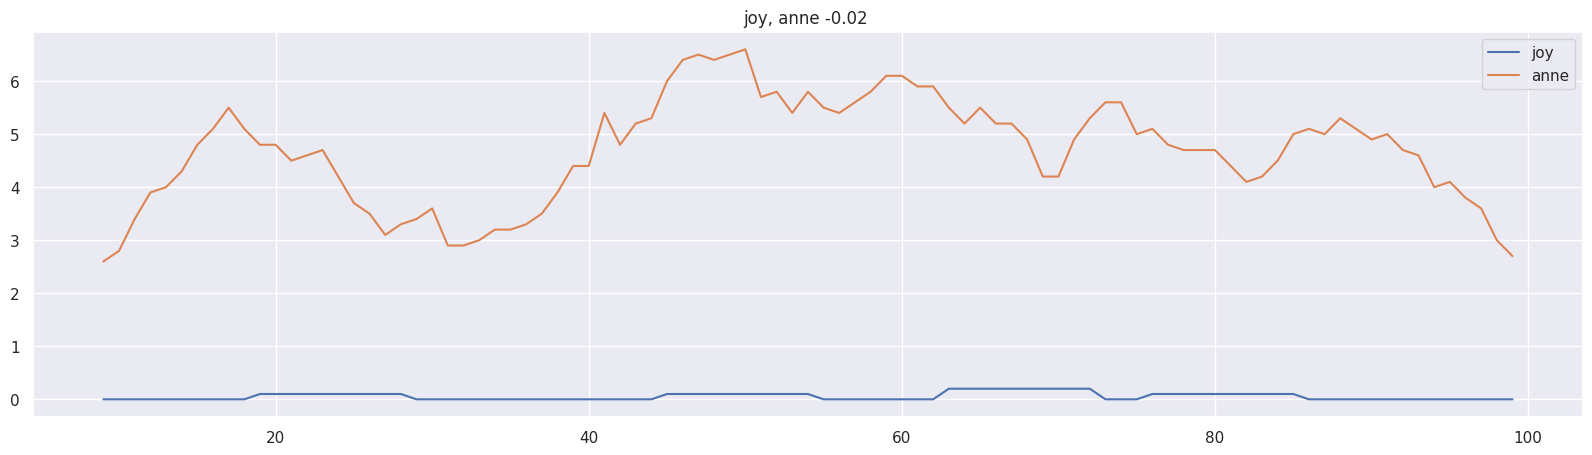

In [28]:
plot_cooc('joy','anne', 0)

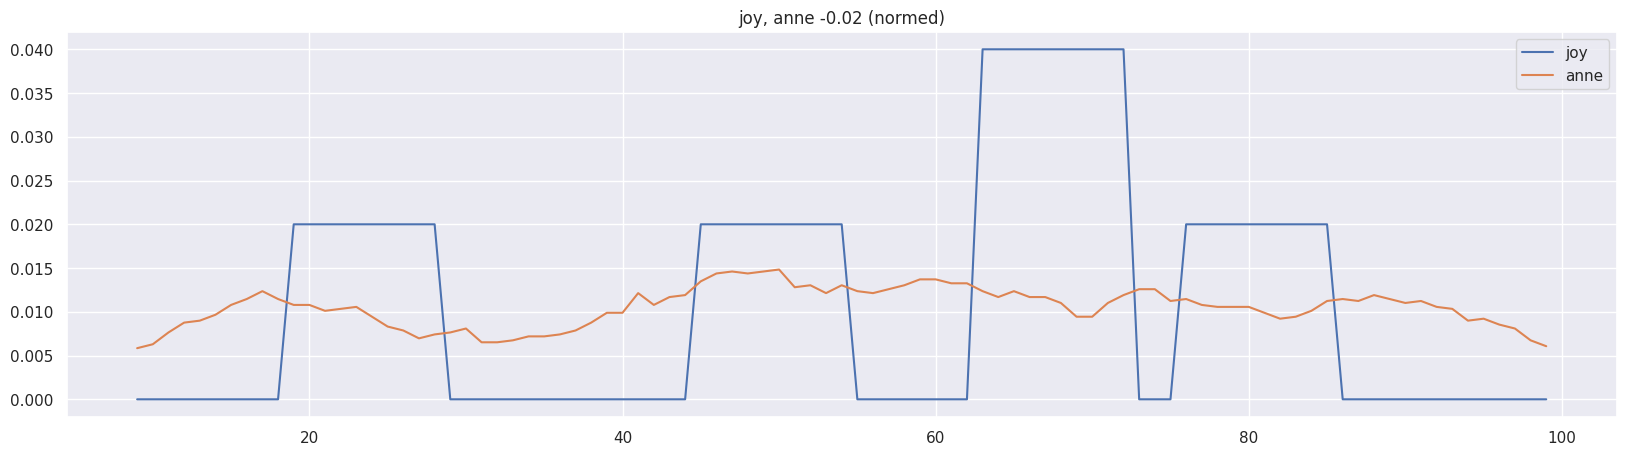

In [29]:
plot_cooc('joy','anne')

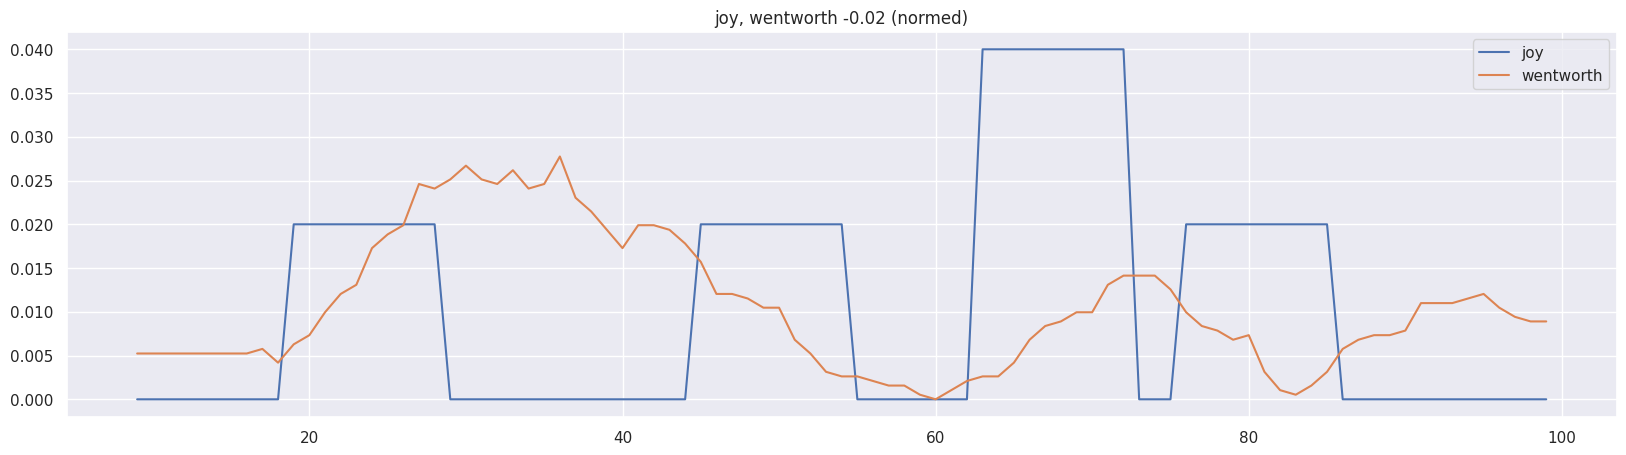

In [30]:
plot_cooc('joy','wentworth')

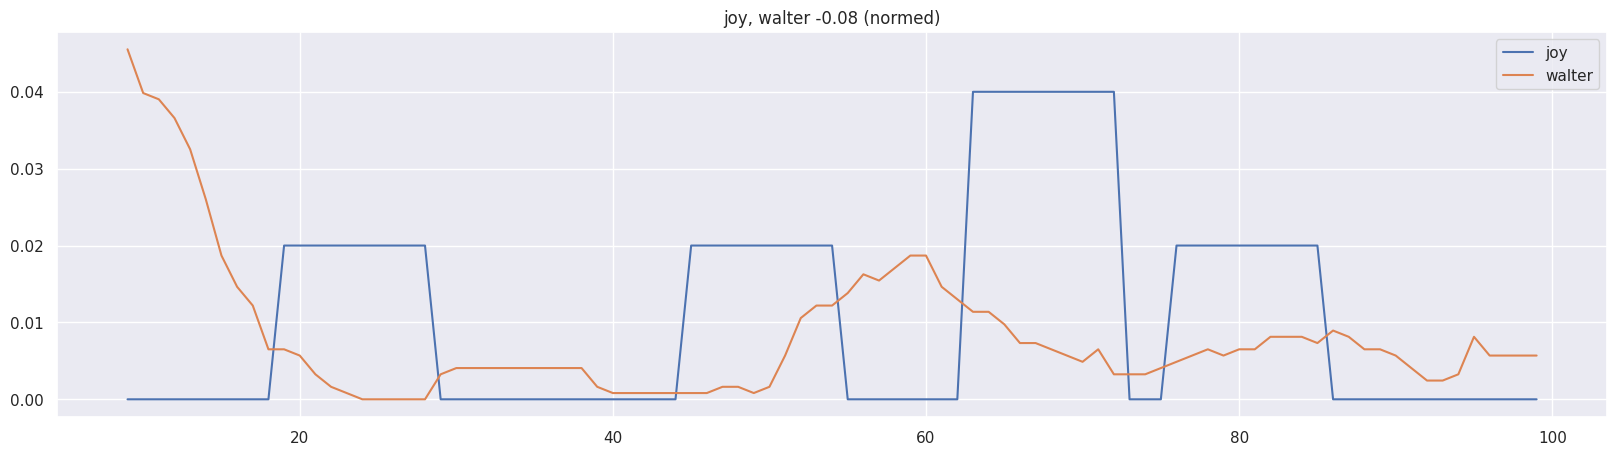

In [31]:
plot_cooc('joy','walter')

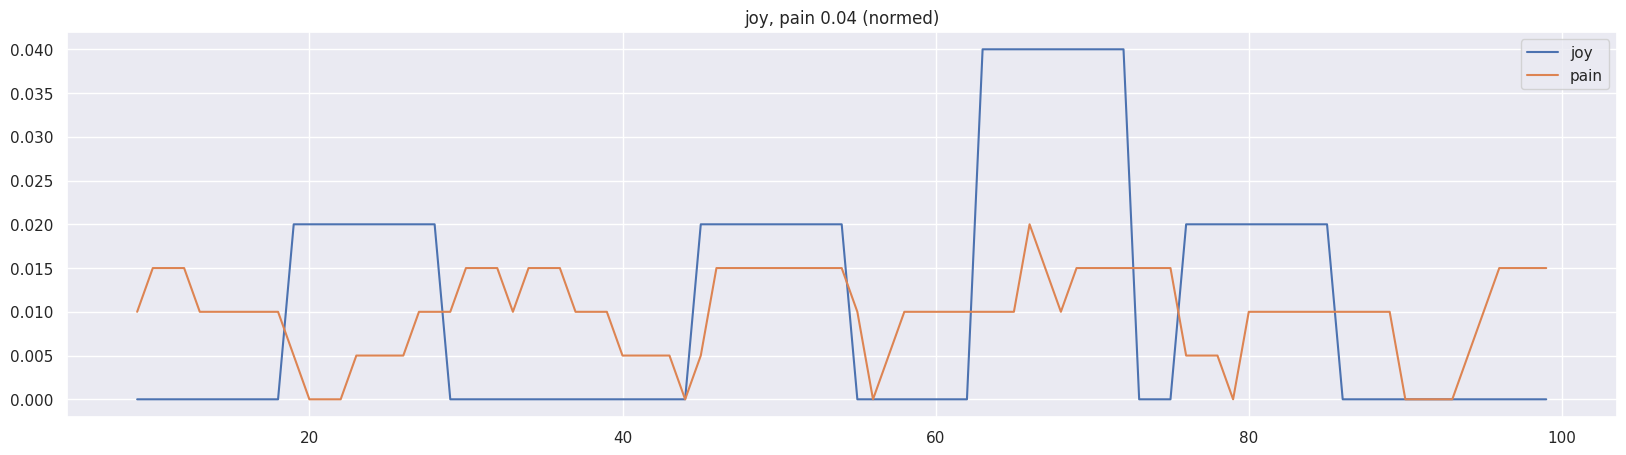

In [32]:
plot_cooc('joy', 'pain')